<a href="https://colab.research.google.com/github/rahmanziaur/TestGraphTheory/blob/main/NetXTest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3])

G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)
G.add_edge(1, 2)
e = (2, 3)

G.add_edge(*e)  # unpack edge tuple*

G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)

In [ ]:
print(G)

Graph with 11 nodes and 10 edges


In [ ]:
G.clear()

In [ ]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [ ]:
print("No of Nodes "+str(G.number_of_nodes()) +"\nNo of Edges "+str(G.number_of_edges()))

No of Nodes 11
No of Edges 10


In [ ]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

In [ ]:
list(G.nodes)
[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
list(G.edges)
[(1, 2), (1, 3), (3, 'm')]
list(G.adj[1])  # or list(G.neighbors(1))
[2, 3]
G.degree[1]  # the number of edges incident to 1


3

In [ ]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
list(H.edges())
[(1, 2), (2, 1)]
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())
[(0, 1), (1, 2), (2, 3)]
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())
[(0, 1), (0, 2), (1, 2)]

[(0, 1), (0, 2), (1, 2)]

In [ ]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]
AtlasView({2: {'color': 'yellow'}})
G[1][2]
{'color': 'yellow'}
G.edges[1, 2]

NameError: ignored

In [ ]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

KeyError: ignored

In [ ]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [ ]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


In [ ]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [ ]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
{'time': '5pm'}
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 2: {}, 3: {'time': '2pm'}})

In [ ]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [ ]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

In [ ]:
DG.out_degree(1, weight='weight')

0.5

In [ ]:
DG.degree(1, weight='weight')

1.25

In [ ]:
list(DG.successors(1))

[2]

In [ ]:
list(DG.neighbors(1))

[2]

In [ ]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

In [ ]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [ ]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

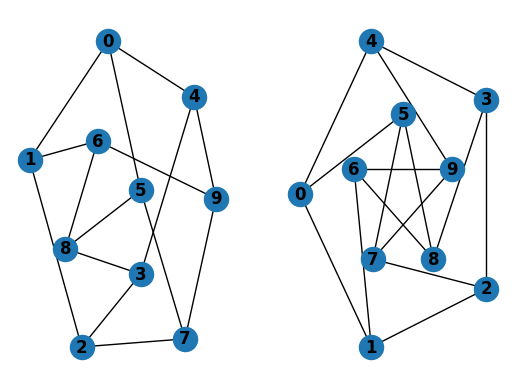

In [ ]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()  

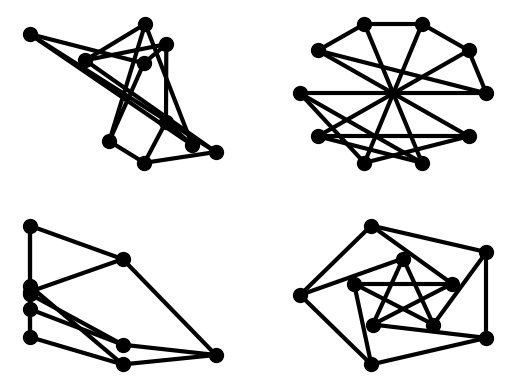

In [ ]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

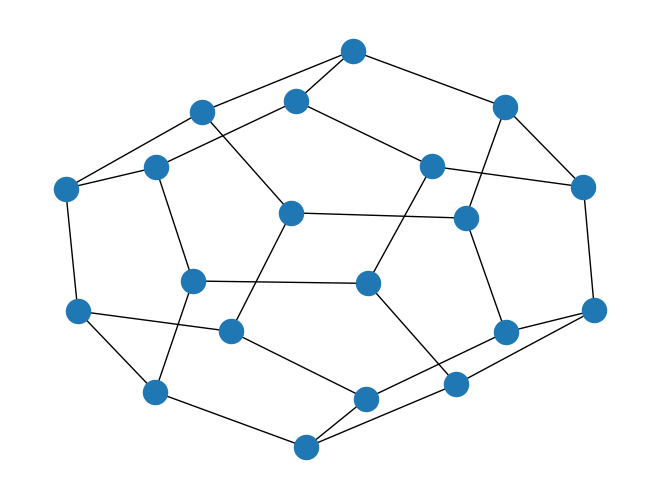

In [ ]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
#nx.draw_shell(G, nlist=shells, **options)

nx.draw(G)
plt.savefig("path.png")

In [ ]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')

ImportError: ignored

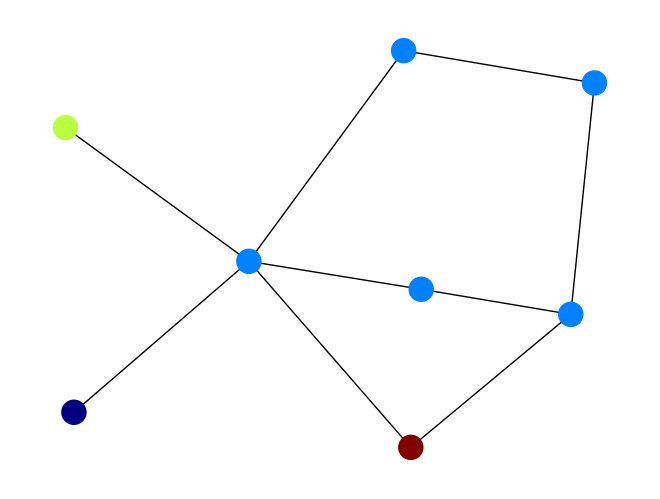

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values)
plt.show()

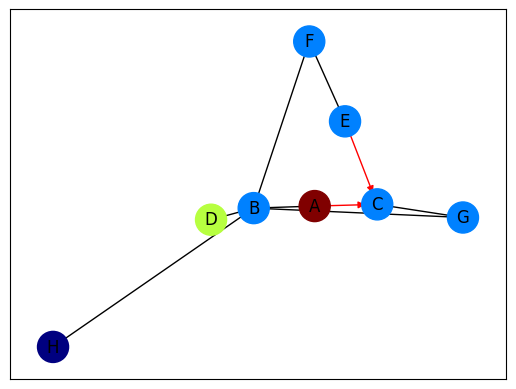

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()

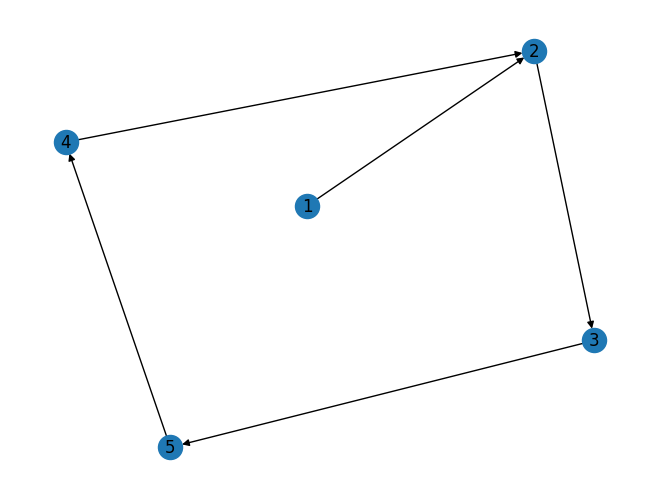

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.DiGraph()
g.add_nodes_from([1,2,3,4,5])
g.add_edge(1,2)
g.add_edge(4,2)
g.add_edge(3,5)
g.add_edge(2,3)
g.add_edge(5,4)

nx.draw(g,with_labels=True)
plt.draw()
plt.show()

['A', 'B', 'C', 'D', 'E', 'F', 'G']
[('A', 'B'), ('B', 'C'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('F', 'G')]


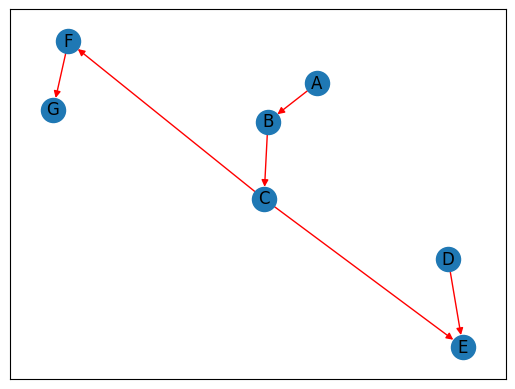

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("E")
G.add_node("F")
G.add_node("G")
G.add_edge("A","B")
G.add_edge("B","C")
G.add_edge("C","E")
G.add_edge("C","F")
G.add_edge("D","E")
G.add_edge("F","G")

print(G.nodes())
print(G.edges())

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows = True)

plt.show()

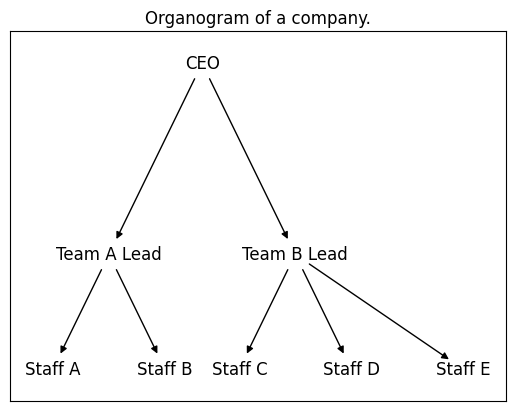

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
nodes = np.arange(0, 8).tolist()
G.add_nodes_from(nodes)
G.add_edges_from([(0,1), (0,2), (1,3), (1, 4),(2, 5), (2, 6), (2,7)])
pos = {0:(10, 10), 1:(7.5, 7.5), 2:(12.5, 7.5), 3:(6, 6), 4:(9, 6), 5:(11, 6), 6:(14, 6), 7:(17, 6)}
labels = {0:"CEO", 1:"Team A Lead", 2: "Team B Lead", 3: "Staff A", 4: "Staff B", 5: "Staff C", 6: "Staff D", 7: "Staff E"}
nx.draw_networkx(G, pos = pos, labels = labels, arrows = True, node_shape = "s", node_color = "white")
plt.title("Organogram of a company.")
#plt.savefig("Output/plain organogram using networkx.jpeg",dpi = 300)
plt.savefig("path.png")
plt.show()

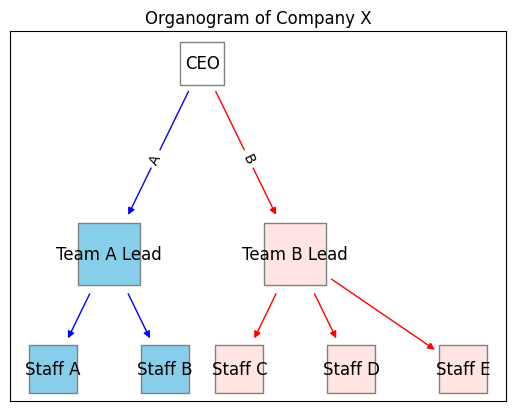

In [ ]:
colors = ["white", "skyblue","mistyrose", "skyblue",
          "skyblue","mistyrose", "mistyrose", "mistyrose"]
edge_colors = ["blue", "red", "blue","blue", "red","red","red"]
sizes = [1000, 2000, 2000, 1200, 1200, 1200, 1200, 1200]
nx.draw_networkx(G, pos = pos, labels = labels, arrows = True,
                 node_shape = "s", node_size = sizes,
                 node_color = colors,
                 edge_color = edge_colors,  #color of the edges
                 edgecolors = "gray")     #edges of the box of node
nx.draw_networkx_edge_labels(G, pos = pos,
                             edge_labels={(0, 1): 'A', (0, 2): 'B'},
                             font_color='black')
plt.title("Organogram of Company X")
plt.show()

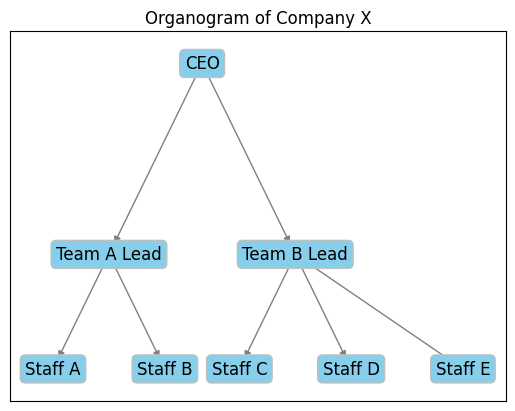

In [ ]:
nx.draw_networkx(G, pos = pos, labels = labels, bbox = dict(facecolor = "skyblue", boxstyle = "round", ec = "silver", pad = 0.3), edge_color = "gray")
plt.title("Organogram of Company X")
plt.show()

In [ ]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [ ]:
G.edges

OutEdgeView([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (2, 7)])

In [ ]:
G.degree

DiDegreeView({0: 2, 1: 3, 2: 4, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1})

In [ ]:
G.in_degree

InDegreeView({0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1})

In [ ]:
G.out_degree

OutDegreeView({0: 2, 1: 2, 2: 3, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0})

In [ ]:
start_node = [node for (node, degree) in G.in_degree if degree == 0]
start_node

[0]

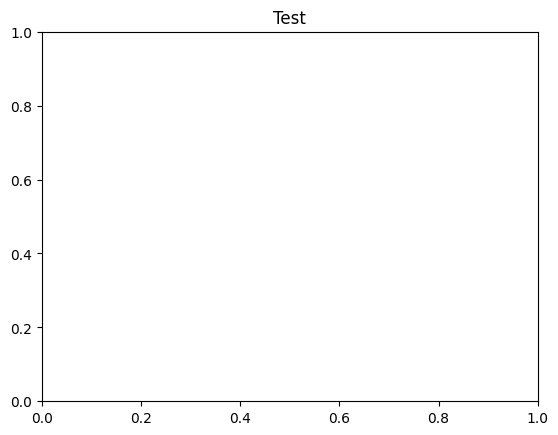

In [ ]:
nx.degree_centrality(G)
plt.title("Test")
plt.show()

In [1]:
import networkx as nx
G = nx.karate_club_graph()
## #nodes: 34 and #edges: 78
print('#nodes:', len(G.nodes()), 'and', '#edges:', len(G.edges()))

#nodes: 34 and #edges: 78


In [3]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pprint
import csv
%matplotlib inline

In [5]:
G = nx.barabasi_albert_graph(20, 6); 
#or read the graph:
#G = nx.read_gexf('Barabasi_Albertrandom.gexf')
print("Edge list {edge: its multiplicity} ") #python 3.5
#print "Edge list {edge: its multiplicity} " #python 2.7
print(nx.adjacency_matrix(G)[:2]) #python 3.5 
#print(nx.adjacency_matrix(G)[:2]) python 2.7    

Edge list {edge: its multiplicity} 
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 15)	1
  (0, 17)	1
  (0, 18)	1
  (1, 0)	1
  (1, 7)	1
  (1, 9)	1
  (1, 10)	1
  (1, 17)	1
  (1, 18)	1


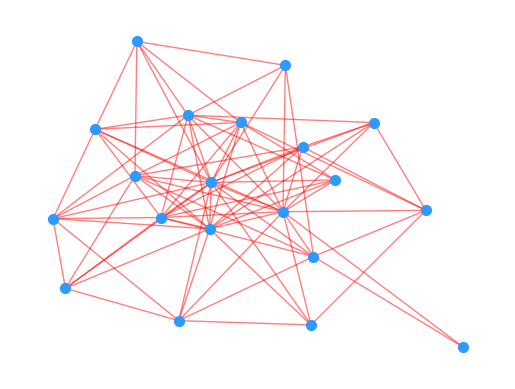

In [6]:
#plt.figure(figsize = (5, 5)) # This line is not needed unless you want to specified the figsize
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='#2E9AFE', node_size=50)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5, edge_color='r')
plt.axis('off')
plt.show()

In [7]:
print("Top 10 Degree centrality nodes: ")
centrality = nx.degree_centrality(G)
sorted(centrality.items(), reverse= True, key=lambda x: x[1])[:10]

Top 10 Degree centrality nodes: 


[(7, 0.894736842105263),
 (0, 0.8421052631578947),
 (9, 0.7368421052631579),
 (2, 0.5789473684210527),
 (10, 0.5789473684210527),
 (11, 0.5263157894736842),
 (3, 0.47368421052631576),
 (8, 0.42105263157894735),
 (13, 0.42105263157894735),
 (14, 0.42105263157894735)]

In [9]:
print("Degree centrality {vertex: centrality} ")
print(nx.closeness_centrality(G))

Degree centrality {vertex: centrality} 
{0: 0.8636363636363636, 1: 0.59375, 2: 0.7037037037037037, 3: 0.6551724137931034, 4: 0.5757575757575758, 5: 0.48717948717948717, 6: 0.5757575757575758, 7: 0.9047619047619048, 8: 0.6333333333333333, 9: 0.7916666666666666, 10: 0.7037037037037037, 11: 0.6785714285714286, 12: 0.59375, 13: 0.6333333333333333, 14: 0.59375, 15: 0.6129032258064516, 16: 0.5757575757575758, 17: 0.6129032258064516, 18: 0.5588235294117647, 19: 0.5588235294117647}


In [10]:
for k, v in sorted(nx.closeness_centrality(G).items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

7 : 0.9047619047619048
0 : 0.8636363636363636
9 : 0.7916666666666666
2 : 0.7037037037037037
10 : 0.7037037037037037
11 : 0.6785714285714286
3 : 0.6551724137931034
8 : 0.6333333333333333
13 : 0.6333333333333333
15 : 0.6129032258064516
17 : 0.6129032258064516
1 : 0.59375
12 : 0.59375
14 : 0.59375
4 : 0.5757575757575758
6 : 0.5757575757575758
16 : 0.5757575757575758
18 : 0.5588235294117647
19 : 0.5588235294117647
5 : 0.48717948717948717


In [12]:
print("Degree centrality {vertex: centrality} ")
print(nx.closeness_centrality(G))
print("Closeness centrality:")
print(nx.closeness_centrality(G))

print("Betweenness centrality:")
print(nx.betweenness_centrality(G))

print("Eigenvector centrality :")
print(nx.eigenvector_centrality(G))

deg = nx.degree_centrality(G)
clo = nx.closeness_centrality(G)
bet = nx.betweenness_centrality(G,normalized=False)
eig = nx.eigenvector_centrality(G)
print("Local clustering coefficient: " )
print(nx.clustering(G))

print("Global clustering coefficient: ")
print(nx.transitivity(G))

print("The assortativity ccoefficient: ")
print(nx.degree_assortativity_coefficient(G))

print("The Degree Pearson correltion (same assortativity, faster algorithm) ccoefficient: ")
print(nx.degree_pearson_correlation_coefficient(G))

#need to choose an attribute based on your data, as an example I used 'color'.
#print("The attribute assortativity ccoefficient for your chosen attribute is: ")
#print(nx.attribute_assortativity_coefficient(G, 'color'))


print("The average neighbor degree is: ")
print (nx.average_neighbor_degree(G))

print("The report for the graph using the nx.info command: ")
#print(nx.info(G))

#The following ones work for connected graphs

#this computes and prints the average of all the distances between each of the n(n-1) pairs of nodes:
#print("The average path (ave. shortest path): ")
#print(nx.average_shortest_path_length(G))

#print("The eccentricities of all nodes: " )
#print(nx.eccentricity(G))
        
#print("The diameter of the network is:")
#print(nx.diameter(G, e=None))

#print("The average path of the network is:")
#print(nx.average_shortest_path_length(G)

Degree centrality {vertex: centrality} 
{0: 0.8636363636363636, 1: 0.59375, 2: 0.7037037037037037, 3: 0.6551724137931034, 4: 0.5757575757575758, 5: 0.48717948717948717, 6: 0.5757575757575758, 7: 0.9047619047619048, 8: 0.6333333333333333, 9: 0.7916666666666666, 10: 0.7037037037037037, 11: 0.6785714285714286, 12: 0.59375, 13: 0.6333333333333333, 14: 0.59375, 15: 0.6129032258064516, 16: 0.5757575757575758, 17: 0.6129032258064516, 18: 0.5588235294117647, 19: 0.5588235294117647}
Closeness centrality:
{0: 0.8636363636363636, 1: 0.59375, 2: 0.7037037037037037, 3: 0.6551724137931034, 4: 0.5757575757575758, 5: 0.48717948717948717, 6: 0.5757575757575758, 7: 0.9047619047619048, 8: 0.6333333333333333, 9: 0.7916666666666666, 10: 0.7037037037037037, 11: 0.6785714285714286, 12: 0.59375, 13: 0.6333333333333333, 14: 0.59375, 15: 0.6129032258064516, 16: 0.5757575757575758, 17: 0.6129032258064516, 18: 0.5588235294117647, 19: 0.5588235294117647}
Betweenness centrality:
{0: 0.17126774568295033, 1: 0.006444

[Refernce Notebook](https://faculty.nps.edu/rgera/MA4404/PythonCode/MetricsV2.html)